# Using Machine Learning to Predict Migration Patterns

## 1. Project Title
Using Machine Learning to Predict Migration Patterns
## 2. Authors
Michael Berman \
Jorge Mata-Ochoa

## 3. Question(s) you addressed, why it is important
Using economic data from the World Bank and political data from Polity Scores, we look to identify factors that contribute to immigration flows worldwide and create models that predict future immigration into and out of a country. Apart from knowing the factors that contributed to the displacement of individuals, countries must be prepared to allocate resources to those arriving. Hence, the intended audience is institutions that track and monitor immigration flow and trends. These institutions can be state actors, for example, State Governments, multilateral organizations—Inter-American Development Bank—or think tanks such as Migration Policy Institute. Since these institutions track and monitor immigration trends, our project can act as a sort of ‘fire alarm’ or warning system for future immigration patterns. As immigration contains a myriad of uncertainties, it is imperative to understand what could and should be prepared so that large scale migration flows do not overwhelm local regions and offset state capacity.

## 4. Background and literature
Building machine learning models to analyze immigration is an emerging field of research. However, this research has typically focused on state governance and conflict, which affects only a subset of countries. Our goal is to supplement this research by adding economic indicators which uniformly affect all countries. 

**Pre-existing literature:**

1. Carammia, Maria Iacus, and Wilkin built a model in 2022 which uses political and news events to forecast asylum applications from Syria into European countries.  https://www.nature.com/articles/s41598-022-05241-8#Abs1. 

    Carammia, M., Iacus, S.M. & Wilkin, T. Forecasting asylum-related migration flows with machine learning and data at scale. Sci Rep 12, 1457 (2022). https://doi.org/10.1038/s41598-022-05241-8
    

2. Dennis Niggle builds a model based on prior bi-lateral immigration flows using a random forest regression estimator. It does not include any economic data. 

    Niggle, Dennis. Predicting Human Migration Using Machine Learning. Medium. (2021). https://medium.com/geekculture/predicting-human-migration-using-machine-learning-548aa902d0ca
    
    
3. This article by the IADB migration studies the ebbs and flows from Latin America using a variety of data sources. This only displays trends in immigration from Latin America, with little explanation on the root cause of immigration. Our analysis will try to identify the paramount factors that cause immigration.

    Migration Flows in Latin America and the Caribbean. Inter-American Development Bank. (2021). https://publications.iadb.org/publications/english/document/Migration-Flows-in-Latin-America-and-the-Caribbean-Statistics-on-Permits-for-Migrants.pdf
    
    
4. The research below goes one step further to identify factors and structural causes for immigration among certain demographics. We expect to find similar results to this study for political and economic factors.

    Park S, Kim G. Factor Structures of Reasons for Immigration Among Older Asian and Latino Immigrants in the United States. Innov Aging. 2019;3(4):igz039. Published 2019 Oct 22. doi:10.1093/geroni/igz039. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6804752/


## 5. Python packages you used and why
- **Pandas** to create dataframes and manipulate data.
- **Matplotlib** to display learning curves.
- **Seaborn** to display pairwise distributions and heatmaps
- **Scikit** learn package with RandomForestRegressor, Linear Regression, KNeighborsRegressor


## 6. Data Sources
1. World Bank databank provides all the worldwide economic data and indicators. Data downloaded includes every country available from the past 50 years.

    Report 1: https://databank.worldbank.org/embed/Report-1/id/987a2d8b
    
    Report 2: https://databank.worldbank.org/embed/economics_report_2/id/dbfe5e7c
    
    
### 2. The UNHCR provides bi-lateral refugees data based on origin and destination by year. 
    UN Data: https://www.un.org/en/development/desa/population/migration/data/estimates2/estimates19.asp
    
    
### 3. Mexico Polity score → description
    Polity data: http://www.systemicpeace.org/inscrdata.html
    
    
4. Net migration for Mexico from 1950 to 2022.
    https://www.macrotrends.net/countries/MEX/mexico/net-migration#:~:text=The%20current%20net%20migration%20rate,a%202.79%25%20decline%20from%202019
    
In our proposal, we planned to create models specific to Latin America. This was because we wanted to maximize predictive power, and Latin American is relatively homogenous compared to other regions in the world. However, the World Bank only provides net migration data in 5-year intervals. This limits the availability of data for training purposes. Therefore, we made a decision to expand our region of interest to all countries with available data for our initial models. Based on existing literature, we included economic data like gdp, inflation, vulnerable employment and more (which you can see in our dataframes). We also wanted to explore the effect of political instability on migration, and so included polity scores. 

After building the initial models with economic indicators, we wanted to get more granular and collect migration data for every year, rather than 5-year intervals. We then located migration data, by year, for Mexico, a Latin American country, to explore the accuracy of the model when we actually have annual migration data. 

The data collected for mexico was on net migration over the last 72 years. As the net migration was negative for all years, it shows that Mexcio has been experiencing net migration loss. This was then merged onto a data frame including economic indicators and societal violence indicators as well. Thus, the resulting data fram was used to run several machine learning models that show cased the best and most probible indicators for migration from Mexico. 

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

First we load the economic data (composed in two reports) sourced from the World Bank Data Bank.

In [2]:
# Import world bank data, explore df1
df1 = pd.read_excel("economics_report_1.xlsx")
df2 = pd.read_excel("economics_report_2.xlsx")
df1

,Time,Time Code,Country Name,Country Code,GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],GDP per capita (constant 2015 US$) [NY.GDP.PCAP.KD],"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]","Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]","Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]","Vulnerable employment, total (% of total employment) (modeled ILO estimate) [SL.EMP.VULN.ZS]",Proportion of women subjected to physical and/or sexual violence in the last 12 months (% of ever-partnered women ages 15-49) [SG.VAW.1549.ZS],"Population, total [SP.POP.TOTL]",migrationpc,Net migration [SM.POP.NETM]
0,1960,YR1960,Afghanistan,AFG,..,..,..,..,..,..,..,8996967,..,..
1,1960,YR1960,Albania,ALB,..,..,..,..,..,..,..,1608800,..,..
2,1960,YR1960,Algeria,DZA,..,2170.312716,..,..,..,..,..,11057864,..,..
3,1960,YR1960,American Samoa,ASM,..,..,..,..,..,..,..,20127,..,..
4,1960,YR1960,Andorra,AND,..,..,..,..,..,..,..,13410,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16495,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 7. Data cleaning
Next, we clean the column names, and drop unecessary columns

In [3]:
# Clean columns and drop time code and country code. 
df1 = df1.drop(['Time Code', 'Country Code'], axis=1)
df1.rename(columns = {'Time':'year', 'Country Name':'country', 'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]':'gdp_growth'}, inplace = True)
df1.rename(columns={'GDP per capita (constant 2015 US$) [NY.GDP.PCAP.KD]':'gdp_pc', 'Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]':'inflation','Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]':'education_exp','Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]':'unemployment','Vulnerable employment, total (% of total employment) (modeled ILO estimate) [SL.EMP.VULN.ZS]':'vulnerable_employent','Proportion of women subjected to physical and/or sexual violence in the last 12 months (% of ever-partnered women ages 15-49) [SG.VAW.1549.ZS]':'women_violence','Population, total [SP.POP.TOTL]':'pop_total','migrationpc':'migration_pc','Net migration [SM.POP.NETM]':'net_migration'}, inplace=True)

df2=df2.drop(['Time Code', 'Country Code', 'GDP per capita (current US$) [NY.GDP.PCAP.CD]'], axis=1)
df2.rename(columns = {'Time':'year', 'Country Name':'country','Poverty headcount ratio at national poverty lines (% of population) [SI.POV.NAHC]':'poverty_percentage', 'GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG]':'gdppc_growth','Real effective exchange rate index (2010 = 100) [PX.REX.REER]':'real_exchange','Age dependency ratio (% of working-age population) [SP.POP.DPND]':'age_dependency','Gini index [SI.POV.GINI]':'gini','Intentional homicides (per 100,000 people) [VC.IHR.PSRC.P5]':'homicidespc','Human capital index (HCI) (scale 0-1) [HD.HCI.OVRL]':'hci','Ratio of female to male labor force participation rate (%) (national estimate) [SL.TLF.CACT.FM.NE.ZS]':'female_male_labor','Refugee population by country or territory of origin [SM.POP.REFG.OR]':'refugees'}, inplace=True)

Then we merge the two reports together using an inner join on year and country. This gives us all the economic indicators for each country per year.

In [4]:
# merge datasets
dfmerged = pd.merge(df1, df2,on=['year','country'], how = 'inner')
dfmerged.head()

,year,country,gdp_growth,gdp_pc,inflation,education_exp,unemployment,vulnerable_employent,women_violence,pop_total,...,net_migration,poverty_percentage,gdppc_growth,real_exchange,age_dependency,gini,homicidespc,hci,female_male_labor,refugees
0,1960,Afghanistan,..,..,..,..,..,..,..,8996967,...,..,..,..,..,81.617266,..,..,..,..,..
1,1960,Albania,..,..,..,..,..,..,..,1608800,...,..,..,..,..,83.710526,..,..,..,68.494439,..
2,1960,Algeria,..,2170.312716,..,..,..,..,..,11057864,...,..,..,..,..,91.649571,..,..,..,..,..
3,1960,American Samoa,..,..,..,..,..,..,..,20127,...,..,..,..,..,..,..,..,..,62.294841,..
4,1960,Andorra,..,..,..,..,..,..,..,13410,...,..,..,..,..,..,..,..,..,..,..


We then convert net migration from a per capita ratio to a per 100,000 people ratio. We also replace all the ".." with NaN.

In [5]:
# Convert migration_pc --> migration per 100,000 people
dfmerged['migration_pc'] = dfmerged['migration_pc']*100000

# set missing values to NA
dfmerged = dfmerged.replace('\.+', np.nan, regex=True)

Then, we import the polity data set, rename columns, and merge with the economic dataframe. 

In [6]:
#import polity dataset 
df_polity=pd.read_excel("p5v2018.xls")

#clean polity dataset 
df_polity=df_polity.drop(['p5', 'cyear', 'ccode', 'scode', 'flag', 'fragment','democ', 'autoc','durable', 'xrreg', 'xrcomp',
       'xropen', 'xconst', 'parreg', 'parcomp', 'exrec', 'exconst', 'polcomp',
       'prior', 'emonth', 'eday', 'eyear', 'eprec', 'interim', 'bmonth',
       'bday', 'byear', 'bprec', 'post', 'change', 'd5', 'sf', 'regtrans'], axis=1)

#rename column
df_polity=df_polity.rename(columns={'country':'country'})


In [7]:
#merge
dfmerged2=dfmerged.merge(df_polity)
dfmerged2

,year,country,gdp_growth,gdp_pc,inflation,education_exp,unemployment,vulnerable_employent,women_violence,pop_total,...,gdppc_growth,real_exchange,age_dependency,gini,homicidespc,hci,female_male_labor,refugees,polity,polity2
0,1960,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8996967.0,...,NaN,NaN,81.617266,NaN,NaN,NaN,NaN,NaN,-10,-10
1,1960,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1608800.0,...,NaN,NaN,83.710526,NaN,NaN,NaN,68.494439,NaN,-9,-9
2,1960,Argentina,NaN,7362.534063,NaN,NaN,NaN,NaN,NaN,20481781.0,...,NaN,NaN,57.683949,NaN,NaN,NaN,27.559615,NaN,5,5
3,1960,Australia,NaN,19953.206339,3.728814,NaN,NaN,NaN,NaN,10276477.0,...,NaN,NaN,63.377078,NaN,NaN,NaN,NaN,NaN,10,10
4,1960,Austria,NaN,12051.151170,1.945749,NaN,NaN,NaN,NaN,7047539.0,...,NaN,NaN,52.403046,NaN,NaN,NaN,NaN,NaN,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7402,2018,Uruguay,0.477907,16037.932109,7.606534,96.347458,8.34,24.430000,NaN,3449290.0,...,0.109558,116.748797,54.852714,39.7,12.060453,0.602368,77.582145,7.0,10,10
7403,2018,Uzbekistan,5.354997,3047.308384,NaN,100.000000,9.35,35.190000,NaN,32956100.0,...,3.540797,NaN,49.488438,NaN,NaN,NaN,NaN,3276.0,-9,-9
7404,2018,Vietnam,7.075789,2456.791224,3.539628,NaN,1.16,53.910000,NaN,95545959.0,...,6.016398,NaN,43.776605,35.7,NaN,0.687239,86.932374,334464.0,-7,-7
7405,2018,Zambia,4.034494,1368.601756,7.494572,NaN,12.01,74.879999,NaN,17351714.0,...,1.048034,88.441579,88.806851,NaN,NaN,0.391176,57.893510,266.0,6,6


Since we are building machine learning models, we have to deal with the null values. Below, we sum up nulls by column, and make a determination whether we will remove the column if it contains too many nulls. After dropping those columns, we drop any remaining rows with null values.

In [8]:
# Remove columns that are mostly null values
dfmerged2.isnull().sum()
df_clean = dfmerged2.drop(['poverty_percentage', 'homicidespc', 'hci', 'female_male_labor', 'refugees', 'women_violence', 'education_exp'], axis=1)

In [9]:
# Drop remaining rows which contain null values
df_ready = df_clean.dropna()

## 8. Descriptive statistics for the data

Before building models, we explore pairwise distributions to check for multicollinearity

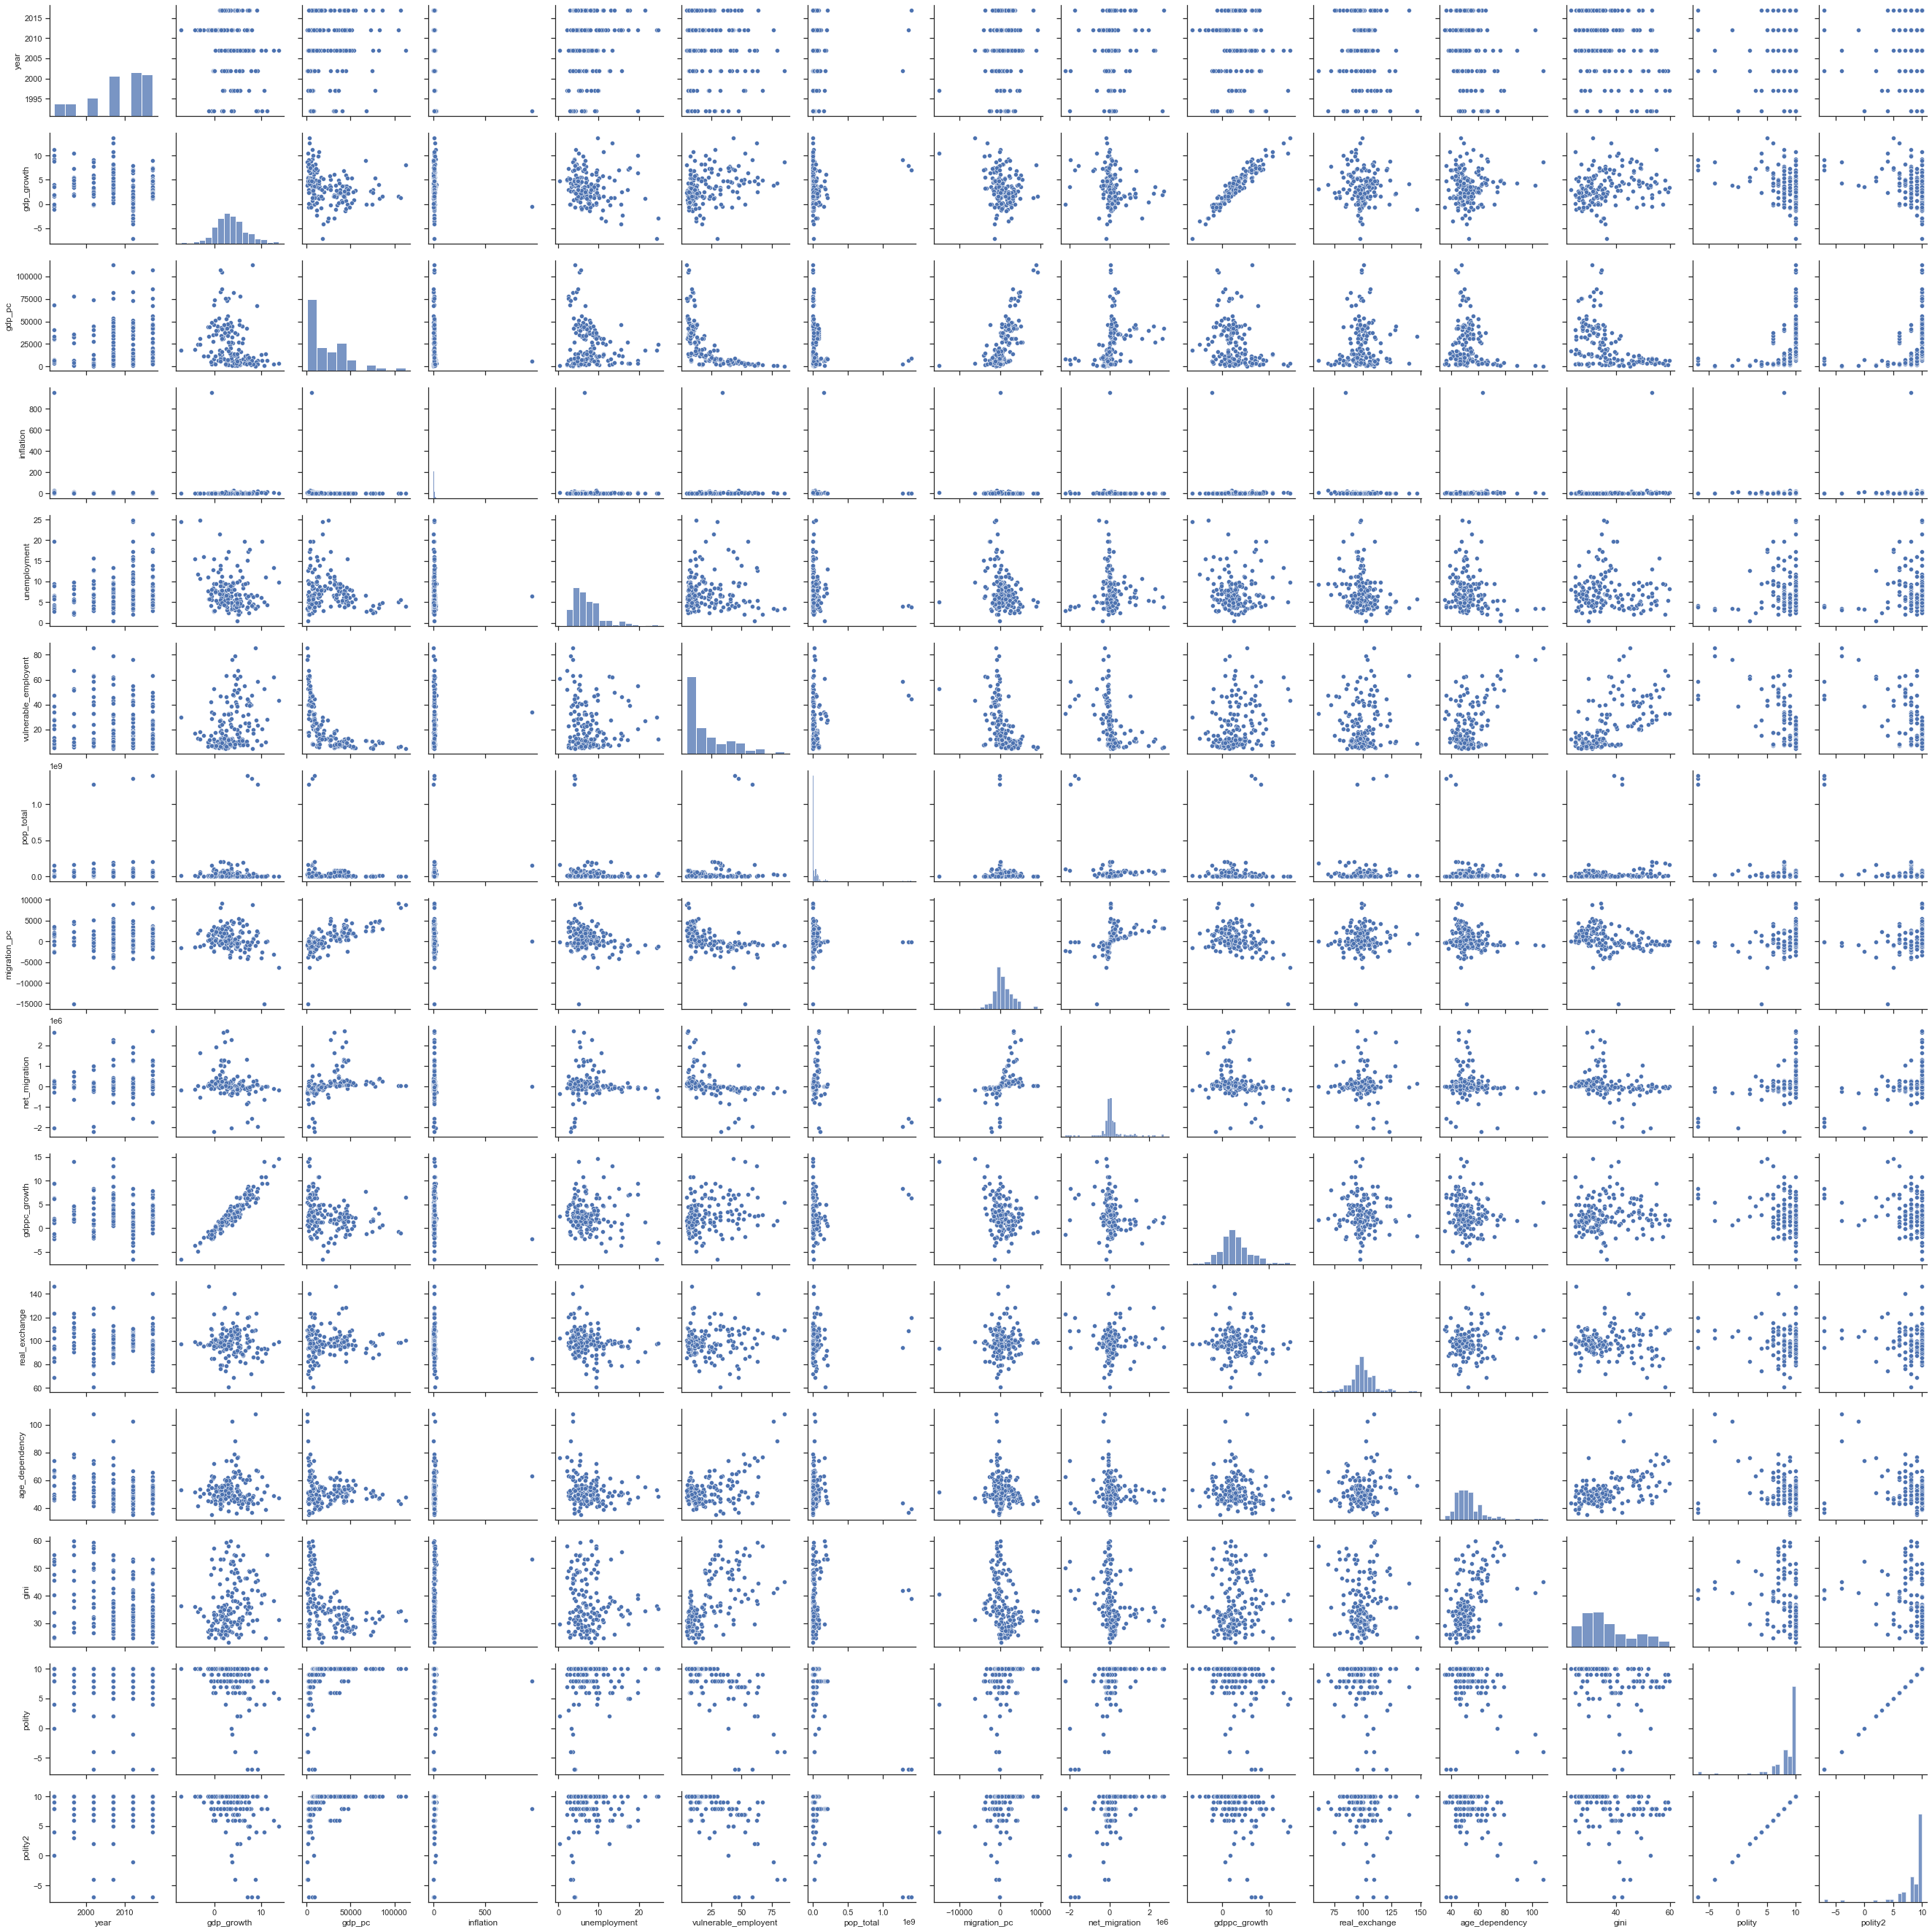

In [10]:
# Explore pairwise distributions
sns.set_theme(style="ticks")
sns.pairplot(df_ready)

We see high multicollinearity between gdp_growth and gdpcc_growth and polity and polity2. Let's remove one variable for each of these pairs when we build the model.

## 8. Analysis

### Model 1: Random Forest Regressor with 100 trees.

In [11]:
# Import random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
seed = 12
rf = RandomForestRegressor(n_estimators=100, random_state=seed)

In [12]:
# Define X and Y series. Drop unecessary columns, and remove 'gdp_growth' and 'polity2' per descriptive analysis
y = df_ready['migration_pc']
X = df_ready.drop(['migration_pc', 'year', 'country', 'gdp_growth', 'polity2'], axis=1)

Since some of the economic indicators are percentages, and others are integers, we need to scale all of the variables so that they are correctly weighted in the model. Then, the scaled features and target (migration_pc) are split into training and testing datasets

In [13]:
# Scale the data
from sklearn.preprocessing import StandardScaler, LabelEncoder
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = seed)

We run the first random forest regressor model. This gives an accuracy of 96.2% for the training data and a 79% accuracy for the test set.

In [14]:
rf.fit(X_train, y_train)
r1 = rf.score(X_train, y_train)
r2 = rf.score(X_test, y_test)
print('R² of Random Forest Regressor on training set: {:.3f}'.format(r1))
print('R² of Random Forest Regressor on test set: {:.3f}'.format(r2))

R² of Random Forest Regressor on training set: 0.962
R² of Random Forest Regressor on test set: 0.790


Let's look at the relative importance of the features:

<AxesSubplot:title={'center':'Feature importance'}>

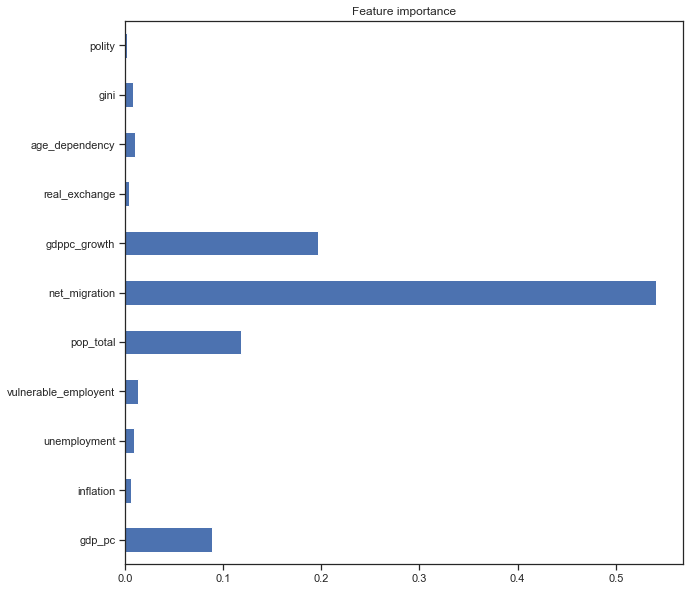

In [15]:
labels = X.columns.values.tolist()
feat_importances = pd.Series(rf.feature_importances_, index=labels)
feat_importances.plot.barh(figsize=(10,10), title="Feature importance")

This makes sense that the most important variables will be net migration and gdp per cpaita growth. Net migration should be highly correlated, but that likely hides the importance of the other variables in affecting migration. By removing this variable, we can identify the specific impact of the economic indicators. 

### Model 2: Random Forest Regressor 
(Exclude net migration)

In [16]:
# import random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
seed = 12
rf2 = RandomForestRegressor(n_estimators=100, random_state=seed)

# Define X and Y series (and remove net_migration and gdp_growth)
y = df_ready['migration_pc']
X = df_ready.drop(['migration_pc', 'year', 'country', 'gdp_growth', 'polity2', 'net_migration'], axis=1) 

# Scale the data
from sklearn.preprocessing import StandardScaler, LabelEncoder
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = seed)

rf2.fit(X_train, y_train)
r1 = rf2.score(X_train, y_train)
r2 = rf2.score(X_test, y_test)
print('R² of Random Forest Regressor on training set: {:.3f}'.format(r1))
print('R² of Random Forest Regressor on test set: {:.3f}'.format(r2))

R² of Random Forest Regressor on training set: 0.943
R² of Random Forest Regressor on test set: 0.516


Model 2 has lower accuracy with the exclusion of net migration. Though it has lower accuracy, this will be more helpful since it excludes the migration trend and focuses solely on changing economic indicators. 

<AxesSubplot:title={'center':'Feature importance'}>

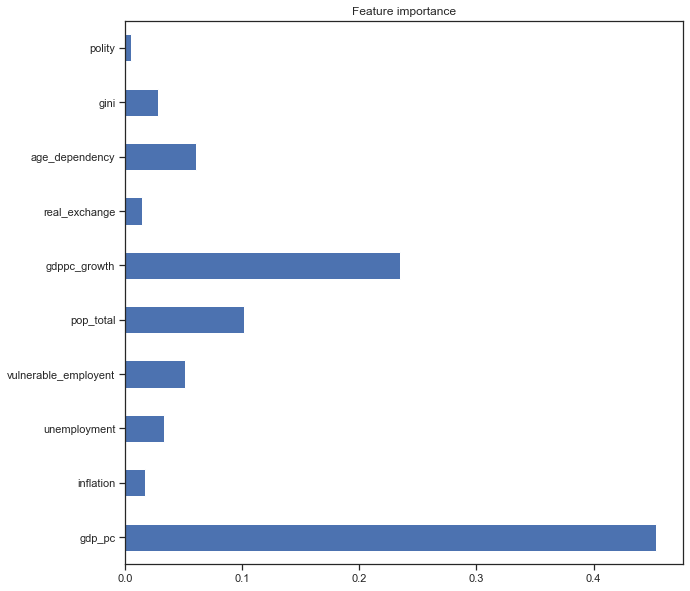

In [17]:
labels = X.columns.values.tolist()
feat_importances = pd.Series(rf2.feature_importances_, index=labels)
feat_importances.plot.barh(figsize=(10,10), title="Feature importance")

### Creating lags
We hypothesize that migration is a lag to changing economic conditions. For instance, if unemployment increases in 1980, migration may increase in 1980, but it is also likely to increase further in 1981 and 1982. In order to test this hypothesis, we created a 1-year and 2-year lag for net migration.

In [18]:
# Create lags
dfmerged2['migration_pc_lag1'] = dfmerged2.groupby('country')['migration_pc'].shift(-1)
dfmerged2['migration_pc_lag2'] = dfmerged2.groupby('country')['migration_pc'].shift(-2)

# Remove columns that are mostly null values
df_clean = dfmerged2.drop(['poverty_percentage', 'net_migration', 'migration_pc','homicidespc', 'hci', 'female_male_labor', 'refugees', 'women_violence', 'education_exp'], axis=1)

In [19]:
#Subset only rows with a non-null value for the lags
df_clean = df_clean.dropna(subset=['migration_pc_lag1', 'migration_pc_lag2'], how='all')

In [20]:
# Create datasets which contain only rows with lag1 and lag2
df_lag1 = df_clean.drop(['migration_pc_lag2'], axis=1)
df_lag1 = df_lag1.dropna(subset=['migration_pc_lag1'])

df_lag2 = df_clean.drop(['migration_pc_lag1'], axis=1)
df_lag2 = df_lag2.dropna(subset=['migration_pc_lag2'])

# Drop remaining null rows
df_lag1 = df_lag1.dropna()
df_lag2 = df_lag2.dropna()

### Model 3: Random Forest Regressor on 1-year lag

In [21]:
# Now that we have lagged variables, let's run same random forest model on the first lag

# import random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
seed = 12
rf3 = RandomForestRegressor(n_estimators=100, random_state=seed)

# Define X and Y series
y = df_lag1['migration_pc_lag1']
X = df_lag1.drop(['migration_pc_lag1', 'year', 'country', 'gdp_growth', 'polity2'], axis=1)

# Scale the data
from sklearn.preprocessing import StandardScaler, LabelEncoder
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = seed)

rf3.fit(X_train, y_train)
r1 = rf3.score(X_train, y_train)
r2 = rf3.score(X_test, y_test)
print('R² of Random Forest Regressor on training set: {:.3f}'.format(r1))
print('R² of Random Forest Regressor on test set: {:.3f}'.format(r2))



R² of Random Forest Regressor on training set: 0.943
R² of Random Forest Regressor on test set: 0.491


Model 3 has the lowest accuracy so far.

### Model 4: Random Forest Regressor on 2-year lag

In [22]:
# Now that we have lagged variables, let's run same random forest model on the second lag

# import random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
seed = 12
rf4 = RandomForestRegressor(n_estimators=100, random_state=seed)

# Define X and Y series
y = df_lag2['migration_pc_lag2']
X = df_lag2.drop(['migration_pc_lag2', 'year', 'country', 'gdp_growth', 'polity2'], axis=1)

# Scale the data
from sklearn.preprocessing import StandardScaler, LabelEncoder
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = seed)

rf4.fit(X_train, y_train)
r1 = rf4.score(X_train, y_train)
r2 = rf4.score(X_test, y_test)
print('R² of Random Forest Regressor on training set: {:.3f}'.format(r1))
print('R² of Random Forest Regressor on test set: {:.3f}'.format(r2))

# We see a higher accuracy, and higher weights given to age dependency and vulnerable employment. 

R² of Random Forest Regressor on training set: 0.922
R² of Random Forest Regressor on test set: 0.545


Model 4 has higher accuracy than models 2 and 3, but less accuracy than model 1. Moving forward, we will test other machine learning techniques on a 2-year lag.

<AxesSubplot:title={'center':'Feature importance'}>

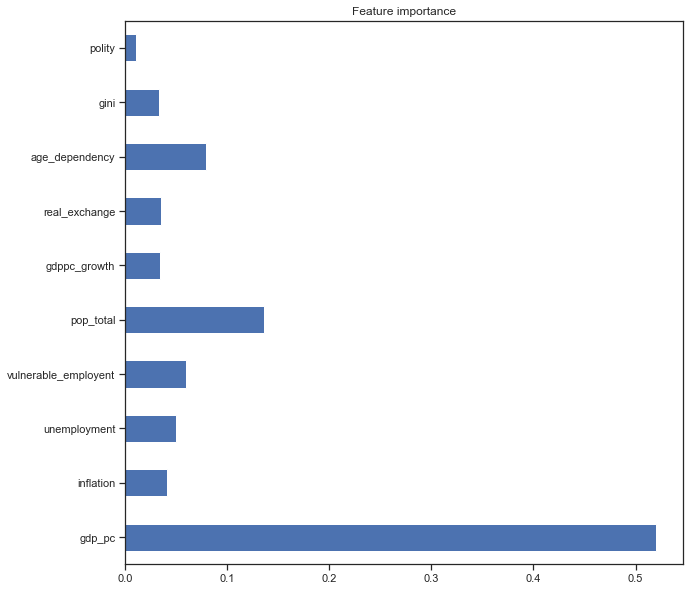

In [23]:
labels = X.columns.values.tolist()
feat_importances = pd.Series(rf4.feature_importances_, index=labels)
feat_importances.plot.barh(figsize=(10,10), title="Feature importance")

### Model 5: KNN on 2-year lag

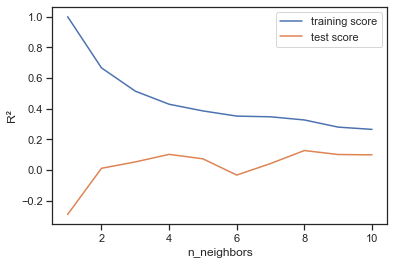

In [24]:
# Import the KNN regressor
from sklearn.neighbors import KNeighborsRegressor

# splitting the dataset into training data, testing data, for both X (independent vars) and y (the target var)

y = df_lag2['migration_pc_lag2']
X = df_lag2.drop(['migration_pc_lag2', 'year', 'country', 'gdp_growth', 'polity2'], axis=1)

# Scale the data
from sklearn.preprocessing import StandardScaler, LabelEncoder
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# import routine for splitting datasets into train and test subsets
from sklearn.model_selection import train_test_split

# The random seed determines the way the data is split by the train_test_split() function. 
seed = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)


# in this section, we will try different numbers of neighbors, from 1 to 10, fit the model, 
# and see how model performance (R²) depends on the number of neighbors

training_score = []  # this list will be populated by R² for training data 
test_score = []      # this list will be populated by R² for test data

# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    
 # build the model
     knn = KNeighborsRegressor(n_neighbors=n_neighbors)
     knn.fit(X_train, y_train)
 # record training set score
     training_score.append(knn.score(X_train, y_train))   # knn.score returns R², here for the training set
 # record test set score
     test_score.append(knn.score(X_test, y_test))   # knn.score returns R², here for the test set
    
# Let's now plot the scores, with the number of neighbors as X axis

plt.plot(neighbors_settings, training_score, label="training score")
plt.plot(neighbors_settings, test_score, label="test score")
plt.ylabel("R²")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

Accuracy for the KNN is low, no matter how many neighbors are used.

### Model 6: Linear regression on 2-year lag

In [25]:
# Linear regression
# import and declare the regressor
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

# fit the model, and compute model performance scores
# Define X and Y series
y = df_lag2['migration_pc_lag2']
X = df_lag2.drop(['migration_pc_lag2', 'year', 'country', 'gdp_growth', 'polity2'], axis=1)

# Scale the data
from sklearn.preprocessing import StandardScaler, LabelEncoder
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = seed)


linreg.fit(X_train, y_train)
l1 = linreg.score(X_train, y_train)
l2 = linreg.score(X_test, y_test)
print('R² of Linear Regression on training set: {:.3f}'.format(l1))
print('R² of Linear Regression on test set: {:.3f}'.format(l2))

R² of Linear Regression on training set: 0.590
R² of Linear Regression on test set: 0.104


Accuracy for the linear model is poor compared to random forest.

### A note on other tests
We created and tested other models that are not included in this notebook due to poor accuracy. One model used the number of refugees as the target, with data provided by the UNHCR. Another model used 'Migrant Stock' as the target. Both of these targets performed worse in all models, and were therefore excluded. We feel migrants per capita is the most accurate target available at this time. 

### Mexico: Using Economic Indicators and Societal Conflict to explain net migration 
In our initial proposal, our region of interest was Latin America, due to its relative homogenous features compared to other volatile regions. However, we did not have enough data for an accurate model. In order to test whether our intuition on whether economics and politics affects migration and to see whether models can be more accurate, we performed a deep-dive on Mexico. Included in this analysis are per year migration rates (rather than 5-year rates provided by the World Bank). We also included an additional dataset on violence variable. 

The violence indicators that were collected from polity were civil violence, summed magnitudes of societal and interstate violence, and the number of states in the designated geopolitical region.These variables indicate whether the country has experienced civil violence or not based off polity's definition. 


In [26]:
#Import data set for Mexico's net migration 
df = pd.read_csv("mexico.csv")
df=df.rename(columns={'Country ':'country'})
df.columns

Index(['country', 'Year', 'Net Migration Rate', 'Growth Rate'], dtype='object')

In [27]:
# Bring in Civil Society violence dataset
df_violence=pd.read_excel("MEPVv2018.xls")
df_violence.columns

Index(['scode', 'ccode', 'country', 'year', 'ind', 'intind', 'intviol',
       'intwar', 'civviol', 'civwar', 'ethviol', 'ethwar', 'inttot', 'civtot',
       'actotal', 'nborder', 'region', 'nregion'],
      dtype='object')

In [28]:
# Clean violence dataset 
df_violence=df_violence.drop(['scode', 'ccode', 'intind', 'intviol',
       'intwar', 'civwar', 'ethviol', 'ethwar', 'inttot',
         'nborder', 'region', 'ind'], axis=1)

df_violence=df_violence.rename(columns={'year':'Year'})

In [29]:
# Merge violence and mexico
df_merge=pd.merge(df, df_violence, on=['country', 'Year'], how='inner')
df_merge.head()

,country,Year,Net Migration Rate,Growth Rate,civviol,civtot,actotal,nregion
0,Mexico,2018.0,-0.478,-9.13%,4.0,4.0,4.0,27.0
1,Mexico,2017.0,-0.526,-8.20%,4.0,4.0,4.0,27.0
2,Mexico,2016.0,-0.573,-7.73%,4.0,4.0,4.0,27.0
3,Mexico,2015.0,-0.621,-7.04%,4.0,4.0,4.0,27.0
4,Mexico,2014.0,-0.668,-6.70%,4.0,4.0,4.0,27.0


In [30]:
# Merge back with economic data 
df_merge=df_merge.rename(columns={'Year':'year'})
df_all=pd.merge(df_merge, dfmerged, on=['country', 'year'], how='inner')
df_all

,country,year,Net Migration Rate,Growth Rate,civviol,civtot,actotal,nregion,gdp_growth,gdp_pc,...,net_migration,poverty_percentage,gdppc_growth,real_exchange,age_dependency,gini,homicidespc,hci,female_male_labor,refugees
0,Mexico,2018.0,-0.478,-9.13%,4.0,4.0,4.0,27.0,2.194995,9945.776845,...,NaN,41.9,1.050314,80.995149,51.012995,46.7,29.071062,0.611657,56.171640,12870.0
1,Mexico,2017.0,-0.526,-8.20%,4.0,4.0,4.0,27.0,2.113129,9842.400712,...,-300000.0,NaN,0.931457,80.878829,51.469242,NaN,25.708998,0.607000,55.369345,11679.0
2,Mexico,2016.0,-0.573,-7.73%,4.0,4.0,4.0,27.0,2.630532,9751.569083,...,NaN,NaN,1.403021,79.031403,51.925374,47.7,19.912695,NaN,55.842987,10387.0
3,Mexico,2015.0,-0.621,-7.04%,4.0,4.0,4.0,27.0,3.293152,9616.645558,...,NaN,NaN,2.019037,90.754059,52.347721,NaN,17.037829,NaN,55.585481,11340.0
4,Mexico,2014.0,-0.668,-6.70%,4.0,4.0,4.0,27.0,2.849773,9426.324588,...,NaN,NaN,1.544035,101.244976,52.861232,48.7,16.625796,NaN,55.010228,10672.0
5,Mexico,2013.0,-0.716,-7.85%,4.0,4.0,4.0,27.0,1.354092,9282.991933,...,NaN,NaN,0.029453,102.270981,53.385310,NaN,19.408863,NaN,55.906714,9396.0
6,Mexico,2012.0,-0.777,-7.28%,4.0,4.0,4.0,27.0,3.642323,9280.258638,...,-422477.0,NaN,2.247140,96.625146,53.948480,48.7,22.142133,NaN,55.648643,8438.0
7,Mexico,2011.0,-0.838,-6.89%,4.0,4.0,4.0,27.0,3.663008,9076.301453,...,NaN,NaN,2.227163,99.796299,54.610102,NaN,23.521232,NaN,54.601071,7471.0
8,Mexico,2010.0,-0.900,-6.35%,4.0,4.0,4.0,27.0,5.118118,8878.561377,...,NaN,NaN,3.617190,100.000000,55.402254,47.2,22.575451,0.589119,54.027957,6809.0
9,Mexico,2009.0,-0.961,-5.97%,4.0,4.0,4.0,27.0,-5.285744,8568.618149,...,NaN,NaN,-6.674165,92.782527,56.222624,NaN,17.608319,NaN,54.126580,6433.0


In [31]:
# Look at nulls 
df_all.isnull().sum()

country                  0
year                     0
Net Migration Rate       0
Growth Rate              0
civviol                  0
civtot                   0
actotal                  0
nregion                  0
gdp_growth               0
gdp_pc                   0
inflation                0
education_exp           21
unemployment            10
vulnerable_employent    11
women_violence          38
pop_total                0
migration_pc            31
net_migration           31
poverty_percentage      38
gdppc_growth             0
real_exchange            0
age_dependency           0
gini                    23
homicidespc             10
hci                     36
female_male_labor        8
refugees                14
dtype: int64

In [32]:
# Clean mexico dataset. Drop net_migration
df_all=df_all.drop(columns={'education_exp', 'women_violence','migration_pc','net_migration', 
                            'poverty_percentage','gini', 'hci','refugees','Growth Rate'})


In [33]:
# Check nulls
df_all.isnull().sum()

country                  0
year                     0
Net Migration Rate       0
civviol                  0
civtot                   0
actotal                  0
nregion                  0
gdp_growth               0
gdp_pc                   0
inflation                0
unemployment            10
vulnerable_employent    11
pop_total                0
gdppc_growth             0
real_exchange            0
age_dependency           0
homicidespc             10
female_male_labor        8
dtype: int64

In [34]:
# Replace ".." with NaN
df_all=df_all.replace('\.+', np.nan, regex=True)

Rather than deleted the columns with 10, 11, 10, and 8 null values, we decided to interpolate those values with the nearest neighbor in order to preserve as many training rows as possible. 

In [35]:
# Interpolate nearest value for the column for missing values 
df_all['unemployment']=df_all['unemployment'].interpolate(method='ffill', limit_direction='forward')
df_all['vulnerable_employent']=df_all['vulnerable_employent'].interpolate(method='ffill', limit_direction='forward')
df_all['homicidespc']=df_all['homicidespc'].interpolate(method='ffill', limit_direction='forward')
df_all['female_male_labor']=df_all['female_male_labor'].interpolate(method='ffill', limit_direction='forward')

# Create mexico specific dataset
df_mex=df_all

<AxesSubplot:>

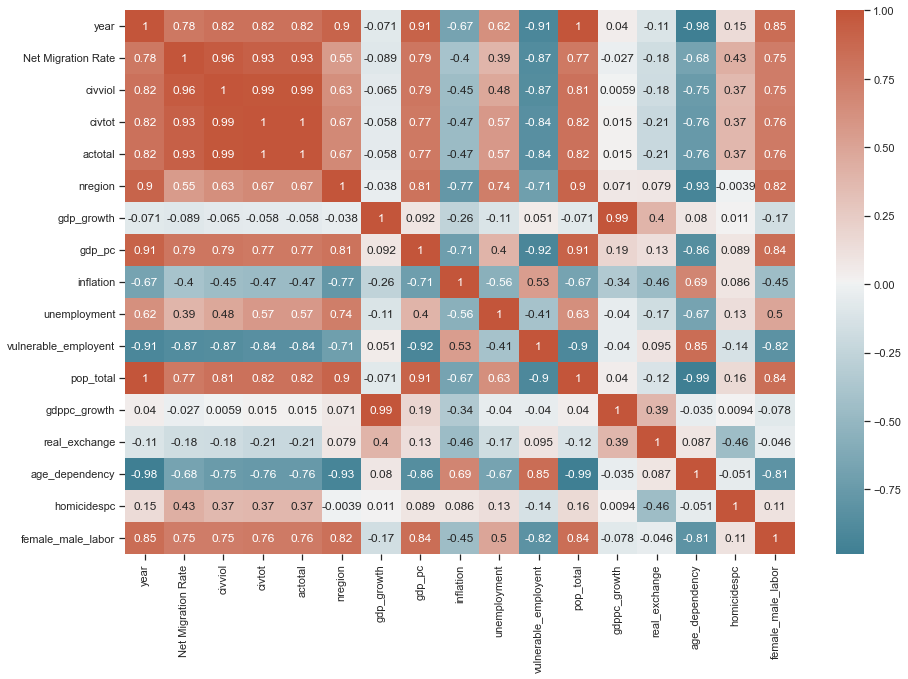

In [36]:
#correlation heat map 
corr2 = df_mex.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr2, xticklabels=corr2.columns, yticklabels=corr2.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [37]:
# import random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
seed = 12
rf = RandomForestRegressor(n_estimators=100, random_state=seed)

In [38]:
# Define X and Y series
y = df_mex['Net Migration Rate']
X = df_mex.drop(['Net Migration Rate', 'country', 'year'], axis=1)

# Scale the data
from sklearn.preprocessing import StandardScaler, LabelEncoder
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = seed)

In [39]:
rf.fit(X_train, y_train)
r1 = rf.score(X_train, y_train)
r2 = rf.score(X_test, y_test)
print('R² of Random Forest Regressor on training set: {:.3f}'.format(r1))
print('R² of Random Forest Regressor on test set: {:.3f}'.format(r2))

R² of Random Forest Regressor on training set: 0.998
R² of Random Forest Regressor on test set: 0.934


After using the random forest predictor, we see an overall high R^2 values for training and test set 

<AxesSubplot:title={'center':'Feature importance'}>

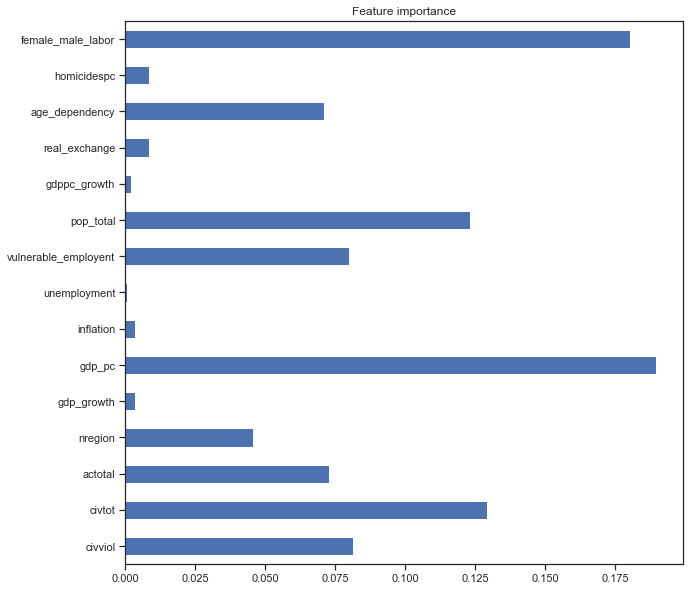

In [40]:
labels = X.columns.values.tolist()
feat_importances = pd.Series(rf.feature_importances_, index=labels)
feat_importances.plot.barh(figsize=(10,10), title="Feature importance")

The features that had the least importance were gdp growth, inflation, unemployment, gdp growth per capita, real exchange, and homicides per capita. 

In [41]:
# import random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
seed = 12
rf2 = RandomForestRegressor(n_estimators=100, random_state=seed)

# Define X and Y series (and remove net_migration and gdp_growth)
y = df_mex['Net Migration Rate']
X = df_mex.drop(['Net Migration Rate', 'country', 'year', 'nregion', 'gdp_growth', 'inflation', 'unemployment','gdppc_growth', 'real_exchange', 'homicidespc' ], axis=1) 

# Scale the data
from sklearn.preprocessing import StandardScaler, LabelEncoder
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = seed)

rf2.fit(X_train, y_train)
r1 = rf2.score(X_train, y_train)
r2 = rf2.score(X_test, y_test)
print('R² of Random Forest Regressor on training set: {:.3f}'.format(r1))
print('R² of Random Forest Regressor on test set: {:.3f}'.format(r2))


R² of Random Forest Regressor on training set: 0.996
R² of Random Forest Regressor on test set: 0.918


After dropping the aformentioned variables with the least importance, the random forest regressor was run once more this time producing similar, albeit smaller, traning and test set R^2 values. 

<AxesSubplot:title={'center':'Feature importance'}>

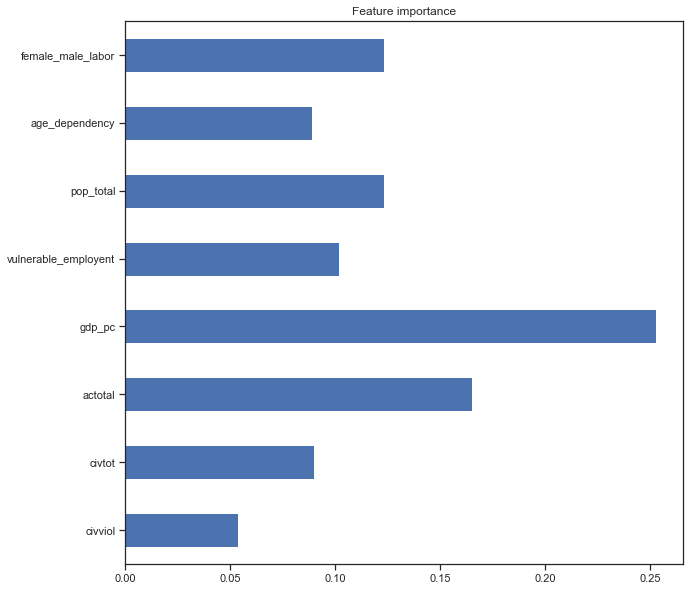

In [42]:
labels = X.columns.values.tolist()
feat_importances = pd.Series(rf2.feature_importances_, index=labels)
feat_importances.plot.barh(figsize=(10,10), title="Feature importance")

After the least important variables were dropped, the feature importance is more noteable is the dpr per capita and violence indicators. 

# Build a Time series model 

In [43]:
# Create lag for time series
df_mex['Net_Migration_Rate_lag1'] = df_mex['Net Migration Rate'].shift(-1)
df_mex['Net_Migration_Rate_lag2'] = df_mex['Net Migration Rate'].shift(-2)

A 1 and two year lag were generated for the net migration variable.

In [44]:
# Create datasets for each lag
df_lag1 = df_mex.drop(['Net_Migration_Rate_lag2'], axis=1)
df_lag1 = df_lag1.dropna(subset=['Net_Migration_Rate_lag1'])

df_lag2 = df_mex.drop(['Net_Migration_Rate_lag1'], axis=1)
df_lag2 = df_lag2.dropna(subset=['Net_Migration_Rate_lag2'])

In [45]:
df_lag1 = df_lag1.dropna()
df_lag2 = df_lag2.dropna()

two data sets, one for a 1-year lag and the other for a 2-year lag and the NaN values were dropped. 

In [46]:
# Now that we have lagged variables, let's run same random forest model on the first lag

# import random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
seed = 12
rf3 = RandomForestRegressor(n_estimators=100, random_state=seed)

# Define X and Y series
y = df_lag1['Net_Migration_Rate_lag1']
X = df_lag1.drop(['Net_Migration_Rate_lag1','Net Migration Rate', 'country', 'year', 'nregion', 'gdp_growth', 'inflation', 'unemployment','gdppc_growth', 'real_exchange', 'homicidespc' ], axis=1)

# Scale the data
from sklearn.preprocessing import StandardScaler, LabelEncoder
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = seed)

rf3.fit(X_train, y_train)
r1 = rf3.score(X_train, y_train)
r2 = rf3.score(X_test, y_test)
print('R² of Random Forest Regressor on training set: {:.3f}'.format(r1))
print('R² of Random Forest Regressor on test set: {:.3f}'.format(r2))




R² of Random Forest Regressor on training set: 0.998
R² of Random Forest Regressor on test set: 0.964


Performing the random forest regressor on the dataset with the 1-year lag produced an extremely high training and test R^2 value that was better than the previous models 

<AxesSubplot:title={'center':'Feature importance'}>

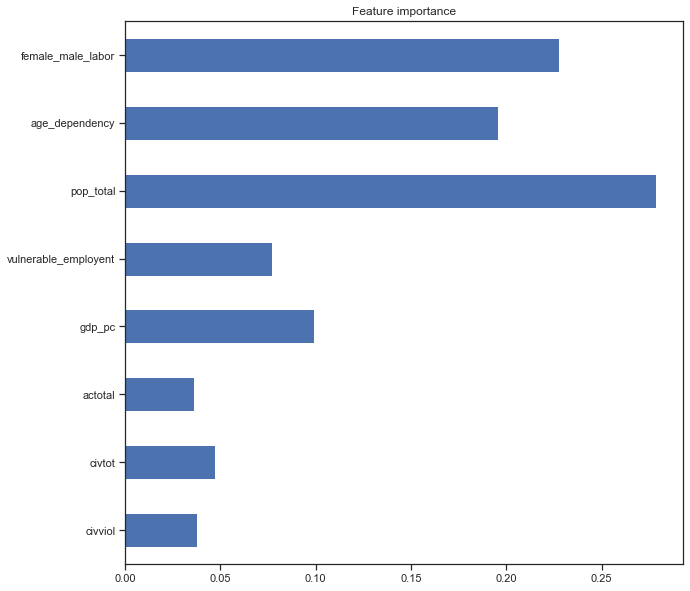

In [47]:
labels = X.columns.values.tolist()
feat_importances = pd.Series(rf3.feature_importances_, index=labels)
feat_importances.plot.barh(figsize=(10,10), title="Feature importance")

after lagging a variable by 1-year, we note that population total was the most important feature in the model 

In [48]:
# Now that we have lagged variables, let's run same random forest model on the second lag

# import random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
seed = 12
rf4 = RandomForestRegressor(n_estimators=80, random_state=seed)

# Define X and Y series
y = df_lag2['Net_Migration_Rate_lag2']
X = df_lag2.drop(['Net_Migration_Rate_lag2','Net Migration Rate', 'country', 'year', 'nregion', 'gdp_growth', 'inflation', 'unemployment','gdppc_growth', 'real_exchange', 'homicidespc' ], axis=1)

# Scale the data
from sklearn.preprocessing import StandardScaler, LabelEncoder
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = seed)

rf4.fit(X_train, y_train)
r1 = rf4.score(X_train, y_train)
r2 = rf4.score(X_test, y_test)
print('R² of Random Forest Regressor on training set: {:.3f}'.format(r1))
print('R² of Random Forest Regressor on test set: {:.3f}'.format(r2))

# We see a higher accuracy, and higher weights given to age dependency and vulnerable employment. 

R² of Random Forest Regressor on training set: 0.999
R² of Random Forest Regressor on test set: 0.992


After running the random forest regressor for the dats set that was lagged for 2-year, we recieved the best R^2 value for the training and test sets out of all the models 

<AxesSubplot:title={'center':'Feature importance'}>

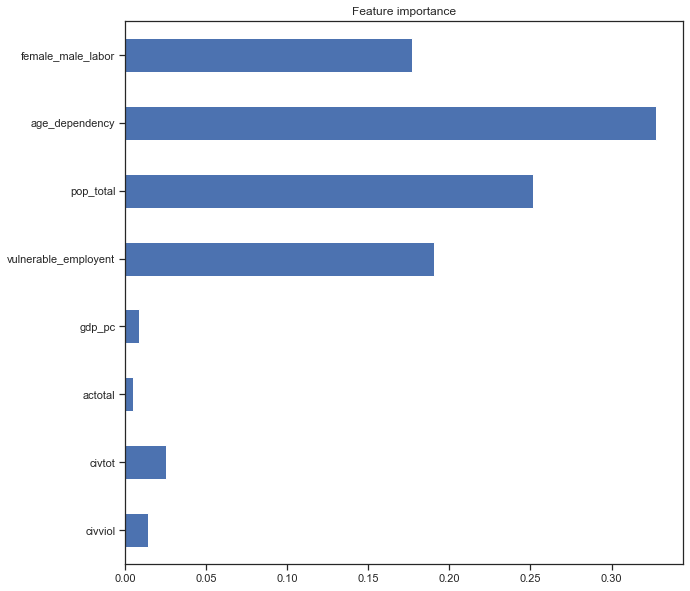

In [49]:
labels = X.columns.values.tolist()
feat_importances = pd.Series(rf4.feature_importances_, index=labels)
feat_importances.plot.barh(figsize=(10,10), title="Feature importance")

In this scenario, age dependency is the most important feature followed by total population

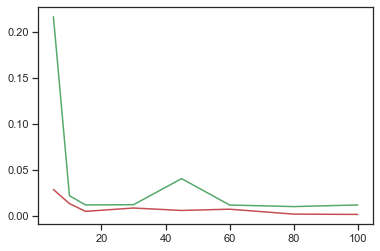

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

train_results = []
test_results = []
list_nb_trees = [5, 10, 15, 30, 45, 60, 80, 100]

for nb_trees in list_nb_trees:
    rf = RandomForestRegressor(n_estimators=nb_trees)
    rf.fit(X_train, y_train)

    train_results.append(mean_squared_error(y_train, rf.predict(X_train)))
    test_results.append(mean_squared_error(y_test, rf.predict(X_test)))

line1, = plt.plot(list_nb_trees, train_results, color="r", label="Training Score")
line2, = plt.plot(list_nb_trees, test_results, color="g", label="Testing Score")



In [81]:
df = pd.DataFrame(y_test)
x_df = pd.DataFrame(X_test)

In [85]:
df_lag2.to_csv('results.csv', index=False)

## 11. Discussion

1.	Our findings indicate that the literature has merit on the indicators that have led to migration trends. Specifically in the Mexican context. Many authors highlight the importance of civil violence and poor earning and their effects of migration out of Mexico. The models proved just that: how Mexico’s net migration loss is a result of years of poor GDP per capita, vulnerable employment and societal violence. However, it was surprising to see how the societal violence indicators fell in importance once the lags were set. 

2.	There were some issues towards the end with the data, for example using interpolation to filling missing data values. Another solution for future cases would be to use multiple imputation find the best estimated for the missing data. Additionally, other models for machine learning were not tested such as OLS or decision tree algorithm to provide a benchmark for the analysis. These are techniques that could be applied in later studies to fine tune the results. In addition, more economic indicators, political and societal indicators could also be aggregated to the dataset to see what effects they have on the model. 


## 12. Conclusions and future work
1.	In the end, we managed to refine our research question based on the data. We had planned to use machine learning to see what economic indicators best predict migration, but narrowed it down evaluate what economic and violence indicators best predict net migration rate from Mexico. Additional data that could be useful as well is to aggregate migration rates over years from various Latin American countries and use that data to run our models. This approach can be extended to other countries and area of the world as well, for example, predicting migration trends from the middle east or even eastern European countries. We expect the results to be used by policy analyst, think tanks, NGOs or multilaterals hoping to look for variation in certain variables to explain and predict future migration trends.